In [ ]:
%pip install beautifulsoup4 requests


In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import time


In [ ]:
def get_reviews(product_url, max_pages=3):
    headers = {
        "User-Agent": "Mozilla/5.0"
    }
    all_reviews = []

    for page in range(1, max_pages + 1):
        url = f"{product_url}&page={page}"
        print(f"Scraping: {url}")
        response = requests.get(url, headers=headers)

        if response.status_code != 200:
            print("Failed to fetch page")
            break

        soup = BeautifulSoup(response.text, 'html.parser')
        reviews = soup.find_all("div", {"class": "_6K-7Co"})

        for review in reviews:
            text = review.get_text(strip=True)
            all_reviews.append(text)

        time.sleep(2)  # polite delay

    return all_reviews


In [ ]:
import pandas as pd

def save_reviews_to_csv(reviews, path):
    df = pd.DataFrame(reviews, columns=["Review"])
    df.to_csv(path, index=False)
    print(f"Saved {len(reviews)} reviews to {path}")


In [28]:
import pandas as pd

sample_reviews = [
    "Absolutely love the Magic Masala flavor! So addictive!",
    "Too salty for my taste, but still crunchy and fresh.",
    "Lay’s has nailed it again. This is my go-to snack.",
    "I didn’t like the aftertaste. Feels artificial.",
    "Perfect for movie nights. My whole family loves it.",
    "Tastes stale. Packaging could be better.",
    "Amazing flavor combo! Spicy, tangy, and crunchy.",
    "Bit expensive for the quantity offered.",
    "Always fresh and crispy. Never disappointed.",
    "I find it too oily compared to other chips.",
    "The masala mix is spot on. Loved it!",
    "Not as good as the classic salted ones.",
    "Great with a cold drink. Party essential.",
    "Not spicy enough for Indian taste buds.",
    "My kids love it. We always keep a pack at home.",
    "Overpriced and underwhelming.",
    "Tastes just like street-style chaat!",
    "Very tasty, but wish there was a bigger pack.",
    "Flavor bursts in every bite!",
    "I found it very average. Nothing special.",
    "Better than Bingo or Uncle Chips in my opinion.",
    "Texture was off. Felt like old stock.",
    "So good! I can finish the whole pack in one go.",
    "Tasted burnt. Bad batch maybe?",
    "I liked it, but not my favorite Lay’s variant.",
    "Always fresh and full of flavor.",
    "Great snack for work breaks.",
    "Flavor is inconsistent between batches.",
    "I’m hooked. Buying it every week now.",
    "Decent chips, but packaging needs improvement."
]

df = pd.DataFrame(sample_reviews, columns=["Review"])
df.to_csv("../data/lays_reviews.csv", index=False)
print(f"Saved {len(df)} sample reviews to ../data/lays_reviews.csv")


Saved 30 sample reviews to ../data/lays_reviews.csv


In [27]:
import os

# Create the data folder
os.makedirs("../data", exist_ok=True)


In [ ]:
%pip install textblob


In [26]:
import pandas as pd
from textblob import TextBlob

# Load reviews
df = pd.read_csv("../data/lays_reviews.csv")

# Add sentiment columns
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['Polarity'] = df['Review'].apply(get_sentiment)
df['Sentiment'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

df.head(10)


,Review,Polarity,Sentiment
0,Absolutely love the Magic Masala flavor! So ad...,0.3750,Positive
1,"Too salty for my taste, but still crunchy and ...",0.3000,Positive
2,Lay’s has nailed it again. This is my go-to sn...,0.0000,Neutral
3,I didn’t like the aftertaste. Feels artificial.,-0.6000,Negative
4,Perfect for movie nights. My whole family love...,0.6000,Positive
5,Tastes stale. Packaging could be better.,0.0000,Neutral
6,"Amazing flavor combo! Spicy, tangy, and crunchy.",0.7500,Positive
7,Bit expensive for the quantity offered.,-0.5000,Negative
8,Always fresh and crispy. Never disappointed.,0.3375,Positive
9,I find it too oily compared to other chips.,-0.1250,Negative


In [25]:
import pandas as pd

# Load data
df = pd.read_csv("../data/lays_reviews.csv")
df.head()


,Review
0,Absolutely love the Magic Masala flavor! So ad...
1,"Too salty for my taste, but still crunchy and ..."
2,Lay’s has nailed it again. This is my go-to sn...
3,I didn’t like the aftertaste. Feels artificial.
4,Perfect for movie nights. My whole family love...


In [24]:
from textblob import TextBlob

# Get polarity and sentiment label
df["Polarity"] = df["Review"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["Sentiment"] = df["Polarity"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))

# Preview
df[["Review", "Polarity", "Sentiment"]].head()


,Review,Polarity,Sentiment
0,Absolutely love the Magic Masala flavor! So ad...,0.375,Positive
1,"Too salty for my taste, but still crunchy and ...",0.300,Positive
2,Lay’s has nailed it again. This is my go-to sn...,0.000,Neutral
3,I didn’t like the aftertaste. Feels artificial.,-0.600,Negative
4,Perfect for movie nights. My whole family love...,0.600,Positive


In [23]:
df["Sentiment"].value_counts()


Sentiment
Positive    18
Neutral      8
Negative     4
Name: count, dtype: int64

/tmp/ipykernel_8347/2998372718.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentiment", palette="Set2")


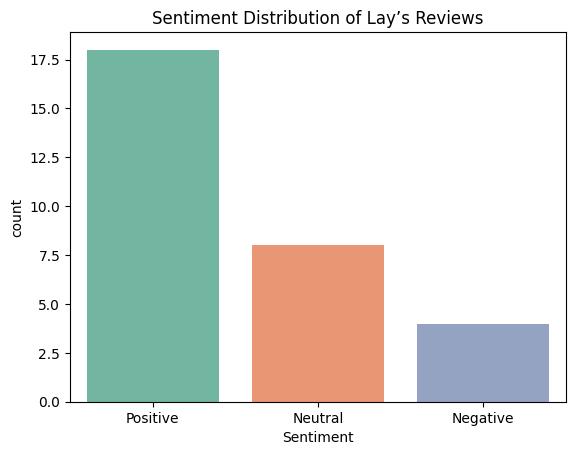

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x="Sentiment", palette="Set2")
plt.title("Sentiment Distribution of Lay’s Reviews")
plt.show()


In [21]:
from collections import Counter
import re

def extract_keywords(text):
    words = re.findall(r'\b[a-z]{3,}\b', text.lower())  # words with ≥3 letters
    stopwords = ['the', 'and', 'for', 'but', 'too', 'very', 'this', 'with', 'from', 'that']
    return [word for word in words if word not in stopwords]

# Flatten all keywords
all_keywords = df["Review"].apply(extract_keywords).sum()
keyword_counts = Counter(all_keywords).most_common(15)
keyword_counts


[('flavor', 5),
 ('fresh', 3),
 ('like', 3),
 ('always', 3),
 ('chips', 3),
 ('not', 3),
 ('pack', 3),
 ('love', 2),
 ('masala', 2),
 ('taste', 2),
 ('crunchy', 2),
 ('lay', 2),
 ('snack', 2),
 ('whole', 2),
 ('tastes', 2)]

In [29]:
ArithmeticError

ArithmeticError

In [30]:
df.to_csv("../data/lays_reviews_cleaned.csv", index=False)
print("✅ Saved cleaned dataset to lays_reviews_cleaned.csv")


✅ Saved cleaned dataset to lays_reviews_cleaned.csv
